# Linear Regression Analysis

*Written by Jin Cheong & Luke Chang*

In this lab we are going to learn how to do simple data analyses using python. 
This module includes learning how to check data, drawing plots for visualization, 
running simple linear regression models, comparing models, & visualizing fits. - This notebook was adapted from material available [here](https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb)

After the tutorial you will have the chance to apply the methods to a new set of data. 


## Basic Data Checks

Preliminary data checks are important because real life data are rarely clean. 
There are missing values, outliers, miscoded values, and other errors.
In this section we will learn how to detect these errors and prepare our dataset for analysis.

We first load the modules that we will be using for this section.  Numpy is akin to Matlab as it can represent n-dimensional matrices and provides lots of useful functions for manipulating data.  Pandas is akin to a data frame in R and provides an intuitive way to interact with data in a 2D data frame.  Matplotlib is a standard plotting library that is similar in functionality to Matlab's object oriented plotting.  Statsmodels is a library for performing various statistical analyses such as linear regression.

```
%matplotlib inline
```
is Jupyter notebook cell magic and allows us to render matplotlib plots within the notebook.

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

We will load the data which is a comma delimited text file using the `read_csv()` method from pandas. 
The '../Data' indicates that we will move one folder up and then into the Data folder.

In [5]:
# Load the data
df = pd.read_csv('../Data/salary.csv')

It is easy to see which variables are currently loaded into your python environment using the `whos` command

In [6]:
whos

Variable   Type              Data/Info
--------------------------------------
df         DataFrame             salary  gender  depar<...>\n\n[77 rows x 5 columns]
np         module            <module 'numpy' from '/Us<...>ages/numpy/__init__.pyc'>
ols        instancemethod    <bound method type.from_f<...>ssion.linear_model.OLS'>>
pd         module            <module 'pandas' from '/U<...>ges/pandas/__init__.pyc'>
plt        module            <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
sm         module            <module 'statsmodels.api'<...>ges/statsmodels/api.pyc'>
smf        module            <module 'statsmodels.form<...>smodels/formula/api.pyc'>


We can return the data frame by simply calling it in a cell.


In [7]:
df

,salary,gender,departm,years,age
0,86285,0,bio,26.0,64.0
1,77125,0,bio,28.0,58.0
2,71922,0,bio,10.0,38.0
3,70499,0,bio,16.0,46.0
4,66624,0,bio,11.0,41.0
5,64451,0,bio,23.0,60.0
6,64366,0,bio,23.0,53.0
7,59344,0,bio,5.0,40.0
8,58560,0,bio,8.0,38.0
9,58294,0,bio,20.0,50.0


However, often the dataframes can be large and we may be only interested in seeing the first few rows.  `df.head()` is useful for this purpose.  `shape` is another useful method for getting the dimensions of the matrix.  We will print the number of rows and columns in this data set by using output formatting.  Use the `%` sign to indicate the type of data (e.g., `%i`=integer, `%d`=float, `%s`=string), then use the `%` followed by a tuple of the values you would like to insert into the text.  See [here](https://pyformat.info/) for more info about formatting text.

In [8]:
print 'There are %i rows and %i columns in this data set' % df.shape
df.head()

There are 77 rows and 5 columns in this data set


,salary,gender,departm,years,age
0,86285,0,bio,26.0,64.0
1,77125,0,bio,28.0,58.0
2,71922,0,bio,10.0,38.0
3,70499,0,bio,16.0,46.0
4,66624,0,bio,11.0,41.0


It is easy to quickly count the number of missing values for each column in the dataset using the `isnull()` method.  One thing that is really nice about Python is that you can chain commands, which means that the output of one method can be the input into the next method.  This allows us to write intuitive and concise code.  Notice how we take the `sum()` of all of the null cases.

In [9]:
df.isnull().sum()

salary     0
gender     0
departm    0
years      1
age        1
dtype: int64

There are different techniques for dealing with missing data.  An easy one is to simply remove rows that have any missing values using the `dropna()` method.

In [10]:
df = df.dropna()

Now we can check to make sure the missing rows are removed.  Let's also check the new dimensions of the dataframe.

In [11]:
print 'There are %i rows and %i columns in this data set' % df.shape
df.isnull().sum()

There are 75 rows and 5 columns in this data set


salary     0
gender     0
departm    0
years      0
age        0
dtype: int64

We can use the `describe()` method to get a quick summary of the continuous values of the data frame. We will `transpose()` the output to make it slightly easier to read. 

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary,75.0,67293.946667,14672.455177,44687.0,56638.5,62557.0,74733.5,112800.0
gender,75.0,0.146667,0.392268,0.0,0.0,0.0,0.0,2.0
years,75.0,14.840000,8.596102,1.0,8.0,14.0,22.5,34.0
age,75.0,45.426667,9.051166,31.0,38.0,44.0,53.0,65.0


We can also get quick summary of a pandas series, or specific column of a pandas dataframe.

In [13]:
df.departm.describe()

count      75
unique      7
top       bio
freq       16
Name: departm, dtype: object

There are several ways to quickly look at the column names.  One is using the `columns` method.  Another is calling the `keys()` of the dataframe

In [14]:
print df.columns
print df.keys()

Index([u'salary', u'gender', u'departm', u'years', u'age'], dtype='object')
Index([u'salary', u'gender', u'departm', u'years', u'age'], dtype='object')


A really nice feature of Pandas is that chaining methods also includes plotting functions.  Here we will first subset the dataframe using a list of the columns we want to retain (e.g., Salary and Gender).  Next we will create a boxplot to see if there is a difference in salary as a function of gender.

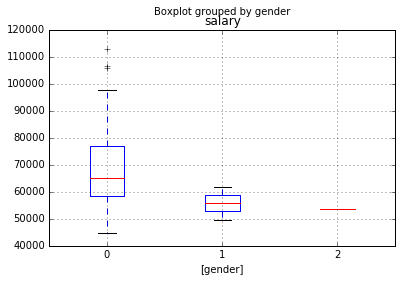

In [15]:
ax = df[['salary','gender']].boxplot(by='gender')

Notice that there are 3 levels.  This probably means that at least one participant did not indicate their gender or selected other.  Let's exclude this datapoint and recreate the plot.  We can input a logical value of rows, and a list of the number of columns using the `.ix` call to the dataframe.

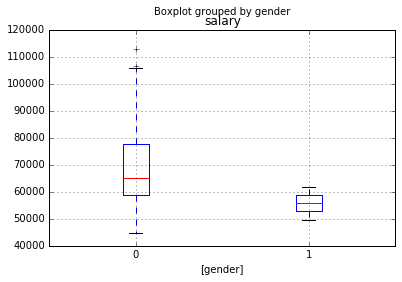

In [64]:
df.ix[df['gender']!=2,['salary','gender']].boxplot(by='gender')

The above code was written concisely as a one liner to omit other gender but to actually subset the data, you'd need to reassign the dataframe. Then we check how many males (gender = 0) and females (gender = 1) are in the dataset. 

In [65]:
df = df[df['gender']!=2]  
df.groupby('gender').size()

gender
0    67
1     9
dtype: int64

We can also create scatterplots to examine a relationship between two continuous variables.

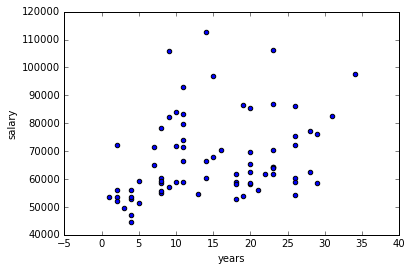

In [21]:
df[['salary','years']].plot(kind='scatter', x='years', y='salary')

In [22]:
# Oneshot visualization
## create a new numericalSeries called dept !! Just for visualization !! 
df['dept_num'] = df.departm.map({'bio':0, 'chem':1,'geol':2,'neuro':3,'stat':4,'physics':5,'math':6})
df.head()

,salary,gender,departm,years,age,dept_num
0,86285,0,bio,26.0,64.0,0
1,77125,0,bio,28.0,58.0,0
2,71922,0,bio,10.0,38.0,0
3,70499,0,bio,16.0,46.0,0
4,66624,0,bio,11.0,41.0,0


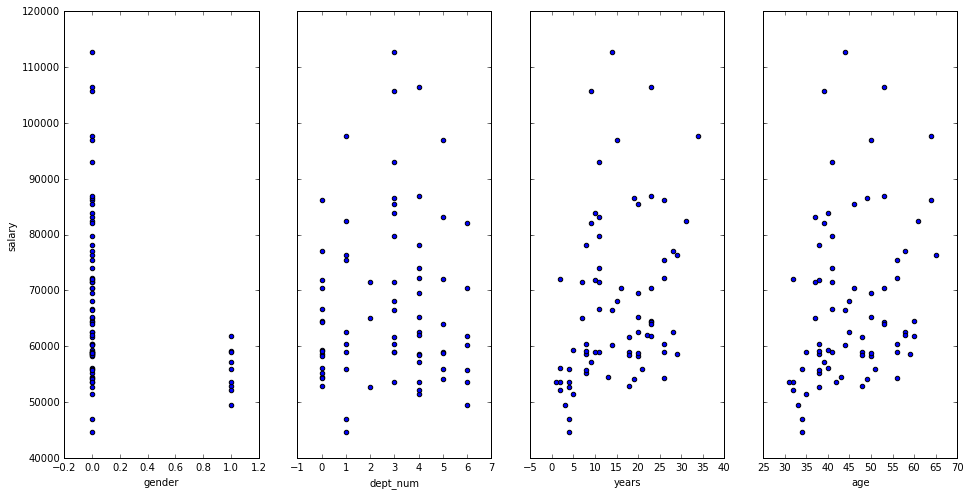

In [23]:
## Now plot all four categories
fig, axs = plt.subplots(1, 4, sharey=True)
df.plot(kind='scatter', x='gender', y='salary', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='dept_num', y='salary', ax=axs[1])
df.plot(kind='scatter', x='years', y='salary', ax=axs[2])
df.plot(kind='scatter', x='age', y='salary', ax=axs[3])
# The problem is that it treats department as a continuous variable. 

## Linear Regression

Now let's move on to running an analysis.

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1\cdot x $

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "estimate" the values of these coefficients. And once we've estimated these parameters, we can use the model to predict things!

## Estimating Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="Figures/estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="Figures/slope_intercept.png">

To run a regression we will be using the statsmodels module that was loaded above.  We will first initalize a model object with the regression equation and the data to use.  The format for specifying the regression equation is similar to R. (y ~ x).

Here we will estimate the effect of gender on salary.  Gender is a "dummy variable", meaning that it is only ones and zeros.

After we have initialized the object instance we can run the fit method (this can be chained so you only need to run one line).  After the parameters have been estimated we can query attributes of the model such as the estimated model parameters.

In [70]:
lm = smf.ols(formula = "salary ~ gender",data=df).fit()

# print the coefficients
print lm.params
print lm.params[1]

Intercept    69576.746269
gender      -13857.079602
dtype: float64
-13857.079602


## Interpreting Model Coefficients

How do we interpret the estimated coefficients for this model?
- $\beta_0$, or the intercept, reflects the average salary for the reference condition of the dummy code (i.e., when gender = 0).  This means that males make an average of `$69576.74`
- to get the estimated female salary we need to add $\beta_1$ (-13857.08), which becomes `$55719.67`

We can also get a summary of all of the model statistics using the `summary()` method.

In [72]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     7.226
Date:                Tue, 05 Apr 2016   Prob (F-statistic):            0.00887
Time:                        07:39:09   Log-Likelihood:                -835.16
No. Observations:                  76   AIC:                             1674.
Df Residuals:                      74   BIC:                             1679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6.958e+04   1773.896     39.223      0.000       6.6e+04  7.31e+04
gender     -1.386e+04   5154.823     -2.688      0.009     -2.41e+04 -3585.871
==============================================================================
Omnibus:                       13.550   Durbin-Watson:                   1.186
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.589
Skew:                           1.007   Prob(JB):                     0.000679
Kurtosis:                       3.740   Cond. No.                         3.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Confidence in our Model

Now let's examine the output. To learn more about Statsmodels and how to interpret the output, DataRobot has some decent posts on [simple linear regression](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) and [multiple linear regression](http://www.datarobot.com/blog/multiple-regression-using-statsmodels/).


**Question:** Is linear regression a high bias/low variance model, or a low bias/high variance model?

**Answer:** High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

A closely related concept is **confidence intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between gender and salary (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

## Overall Model Fit

The overall goodness of how well the model fits the data can be described using the AIC or BIC which are information criterions that penalize for the number of free parameters in the model.  A common way to evaluate the overall fit of a linear model is **$R^2$** value. $R^2$ is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

$R^2$ is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

In the model above, we see that $R^2$=0.089, which means that gender does not do a great job at predicting the overall salary.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$Salary = \beta_0 + \beta_1 \cdot Gender + \beta_2 \cdot Years$

Let's use Statsmodels to estimate these coefficients:

In [73]:
lm2 = smf.ols(formula = "salary ~ gender + years",data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     5.816
Date:                Tue, 05 Apr 2016   Prob (F-statistic):            0.00456
Time:                        07:40:45   Log-Likelihood:                -819.39
No. Observations:                  75   AIC:                             1645.
Df Residuals:                      72   BIC:                             1652.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6.274e+04   3519.695     17.826      0.000      5.57e+04  6.98e+04
gender     -1.044e+04   5076.482     -2.056      0.043     -2.06e+04  -318.020
years        394.2465    193.182      2.041      0.045         9.146   779.347
==============================================================================
Omnibus:                       18.281   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.163
Skew:                           1.171   Prob(JB):                     1.54e-05
Kurtosis:                       4.268   Cond. No.                         59.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we see that `years` also significantly explains additional variance.

This is reflected in the $R^2$, which has now increased from 0.089 to 0.139. It is important to note that **$R^2$ will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to $R^2$ called **adjusted $R^2$** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

Next week we will explore another approach known as **Cross-validation.** Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

Here, we will try and see if the new model significantly explains additional variance controlling for the extra free parameter using a nested model comparison.

In [74]:
print sm.stats.anova_lm(lm,lm2) 

   df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0      74.0  1.560138e+10      0.0           NaN       NaN       NaN
1      72.0  1.355575e+10      2.0  2.045622e+09  5.432557  0.006347


We see that the addition of `years` in model2 significantly explains additional variance when compared to model 1. Notice that this is similar to the results provided by the t-tests on the individual parameters. Using model comparison to test incrementally adding a single predictor is a feature selection method known as stepwise regression.  However, you can also perform model comparison on models with many different features as long as one is nested within the other.

When we only had one predictor we could investigate the relationship using a scatterplot.  Now that we have 2 predictors, we need to make a 3 dimensional plot to see the effect of each predictor on salary. 

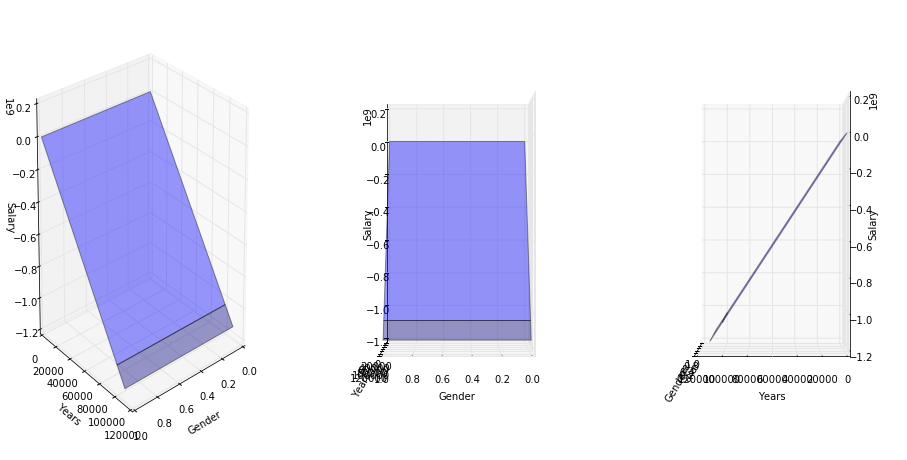

In [158]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,8))
idx = [131,132,133]
pos = {0:(50,20),1:(90,0),2:(-180,0)}
for i,ii in enumerate(idx):
    ax = fig.add_subplot(ii, projection='3d')

    # generate a mesh
    x_surf = np.arange(0,11)/10.0
    y_surf = np.arange(0,112800,10000)
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)

    exog = pd.core.frame.DataFrame({'gender': x_surf.ravel(), 'years': y_surf.ravel()})
    exog['intercept'] = np.ones(exog.shape[0])
    out = lm2.predict(exog = exog,transform=False)
    ax.plot_surface(x_surf, y_surf,
                    out.reshape(x_surf.shape),
                    alpha = 0.4)

    ax.set_xlabel('Gender')
    ax.set_ylabel('Years')
    ax.set_zlabel('Salary')
    ax.azim = pos[i][0]
    ax.elev = pos[i][1]

Notice how when we rotate the 3D plot, we can make projections into 2 dimensional space.  This is the effect of each predictor on salary controlling for the other.  

**Question:** Why do you think that the slope of gender on salary is flat?

**Answer:** Because gender only provides a constant shift in salary predictions, meaning it's slope is 0

We can also generate additional diagnostic plots.

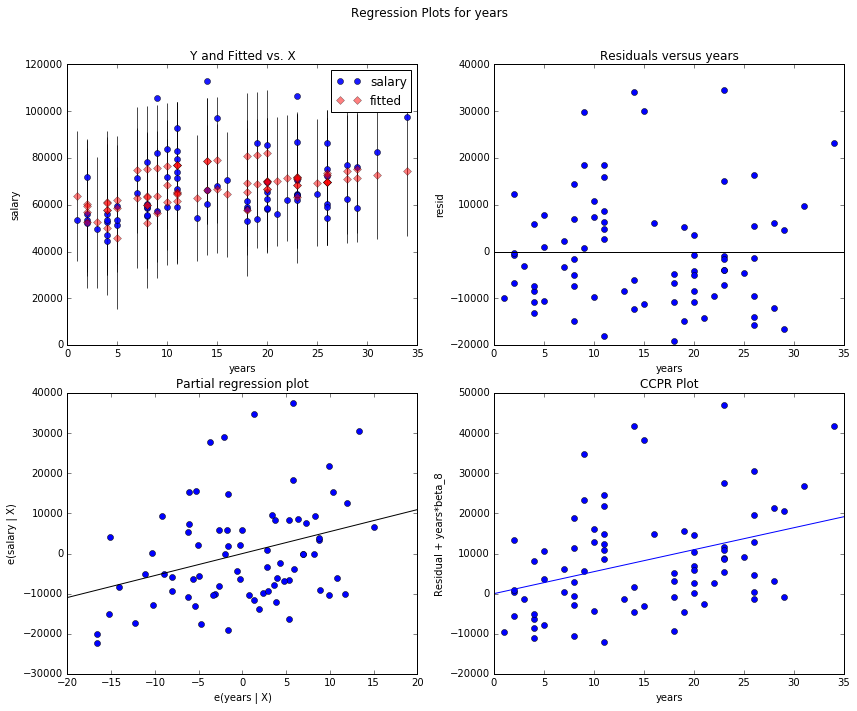

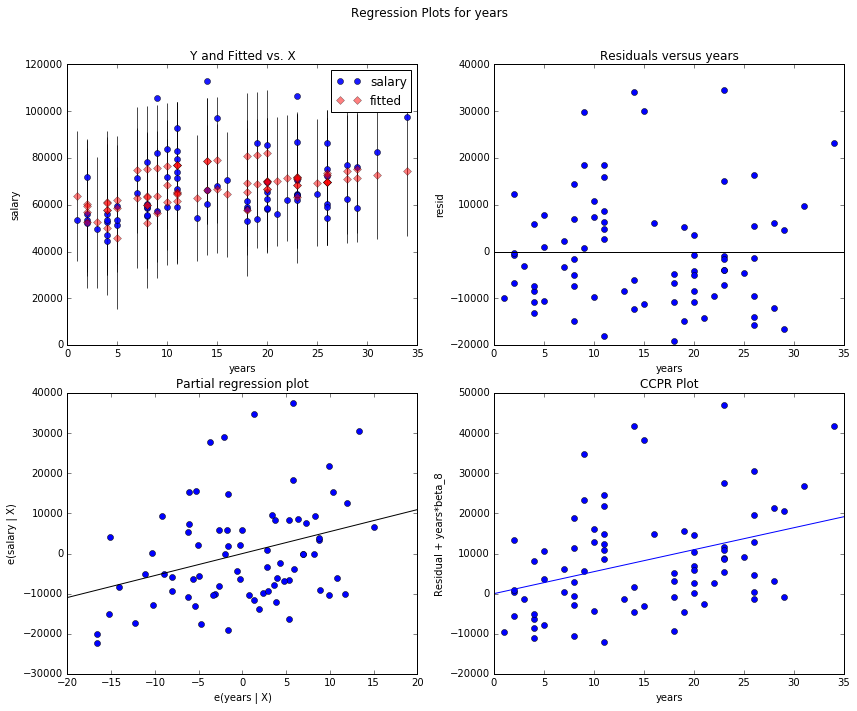

In [29]:
ax = plt.figure(figsize=(12,10))
sm.graphics.plot_regress_exog(lm2, 'years',fig=ax)

In [37]:
# Get regression table, F statistics as if doing Anova
# df for departm is 6 because there was 7 departm categories. 
# F stat tests whether at least one of the coefficients of the variables of a category
# is significantly different from 0 or not
# Type of SSQ to consider https://mcfromnz.wordpress.com/2011/03/02/anova-type-iiiiii-ss-explained/

# Type 1 SSQ
import statsmodels.api as sm
from statsmodels.formula.api import ols
print('ANOVA table for Type 1 SSQ')
print(sm.stats.anova_lm(lm2,typ=1))
print 
# Type 2 SSQ: tests each main effect after the other main effect, without interaction term
print('ANOVA table for Type 2 SSQ')
print(sm.stats.anova_lm(lm2,typ=2))
print 
# Type 3 SSQ: valid for models with significant interaction terms
print('ANOVA table for Type 3 SSQ')
print sm.stats.anova_lm(lm2,typ=3)

ANOVA table for Type 1 SSQ
            df        sum_sq       mean_sq         F    PR(>F)
gender     1.0  1.417128e+09  1.417128e+09  7.457248  0.007963
years      1.0  8.289032e+08  8.289032e+08  4.361876  0.040339
Residual  71.0  1.349239e+10  1.900336e+08       NaN       NaN

ANOVA table for Type 2 SSQ
                sum_sq    df         F    PR(>F)
gender    7.984807e+08   1.0  4.201786  0.044076
years     8.289032e+08   1.0  4.361876  0.040339
Residual  1.349239e+10  71.0       NaN       NaN

ANOVA table for Type 3 SSQ
                 sum_sq    df           F        PR(>F)
Intercept  5.945008e+10   1.0  312.839749  1.000469e-27
gender     7.984807e+08   1.0    4.201786  4.407610e-02
years      8.289032e+08   1.0    4.361876  4.033874e-02
Residual   1.349239e+10  71.0         NaN           NaN


## Additional Resources for Learning about Regression

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/). Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read a [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.
- This [introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) is much more detailed and mathematically thorough, and includes lots of good advice.
- This is a relatively quick post on the [assumptions of linear regression](http://pareonline.net/getvn.asp?n=2&v=8).

# Individual exercise
### Use the 'salary_exercise.csv' to apply the analyses we learned today.

This dataset was adapted from material available [here](http://data.princeton.edu/wws509/datasets/#salary)

These are the salary data used in Weisberg's book, consisting of observations on six variables for 52 tenure-track professors in a small college. The variables are:

- sx = Sex, coded 1 for female and 0 for male
- rk = Rank, coded
 - 1 for assistant professor,
 - 2 for associate professor, and
 - 3 for full professor
- yr = Number of years in current rank
- dg = Highest degree, coded 1 if doctorate, 0 if masters
- yd = Number of years since highest degree was earned
- sl = Academic year salary, in dollars.

Reference: S. Weisberg (1985). Applied Linear Regression, Second Edition. New York: John Wiley and Sons. Page 194.

### Here are some sample questions to get you started
1. Load the data 'salary_exercise.csv' into a pandas dataframe. 
2. Examine the data. Draw boxplots and scatterplots as you deem necessary. 
    Are there any missing data? Try cleaning and subsetting the data to use.
3. Try a simple linear regression model with sex predicting salary. Are the coefficients significant? How would you interpret the results? 
4. What happens if you add other variables into your model? How would you compare the models? Which model fits best? 
5. ***Challenge*** Plot the least squares line for your simple linear regression. Consult the internet for help / ideas. 